In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing 

In [2]:
df = pd.read_csv("C:/Users/Deepthi/Desktop/srikar/train.csv")

In [3]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [4]:
df.describe()

,id,label
count,20800.000000,20800.000000
mean,10399.500000,0.500625
std,6004.587135,0.500012
min,0.000000,0.000000
25%,5199.750000,0.000000
50%,10399.500000,1.000000
75%,15599.250000,1.000000
max,20799.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [6]:
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [7]:
df.corr()

,id,label
id,1.00000,0.00114
label,0.00114,1.00000


In [11]:
df.shape

(20800, 5)

In [13]:
df = df.dropna(axis=0, how="any")

In [14]:
df.shape

(20203, 4)

In [15]:
df.isnull().sum()

id       0
title    0
text     0
label    0
dtype: int64

In [ ]:
df.drop('title',axis=1,inplace=True)

In [12]:
df.drop('author',axis=1,inplace=True)

In [ ]:
df.drop('text',axis=1,inplace=True)

In [8]:
le = preprocessing.LabelEncoder()

In [16]:
le.fit(df['title'].values)
df['title'] = le.transform(df['title'].values)

In [17]:
le.fit(df['text'].values)
df['text'] = le.transform(df['text'].values)

In [18]:
df.head()

,id,title,text,label
0,0,7593,7873,1
1,1,5845,6193,0
2,2,18666,18682,1
3,3,143,17055,1
4,4,8511,12718,1


In [19]:
x=df.iloc[:,:-1].values



In [21]:
y=df.iloc[:,-1].values


In [20]:
x

array([[    0,  7593,  7873],
       [    1,  5845,  6193],
       [    2, 18666, 18682],
       ...,
       [20797,  9938, 15119],
       [20798, 10824, 10436],
       [20799, 18284,   485]], dtype=int64)

In [22]:
y

array([1, 0, 1, ..., 0, 1, 1], dtype=int64)

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
model = LinearRegression()

In [27]:
model.fit(x_train,y_train)

LinearRegression()

In [28]:
model.score(x_train,y_train)

0.006804343771252608

In [29]:
model.score(x_test,y_test)

0.005720176092945839

In [31]:
y_pred = model.predict(x_test)

In [32]:
from sklearn.metrics import r2_score

In [33]:
r2_score(y_test,y_pred)

0.005720176092945839

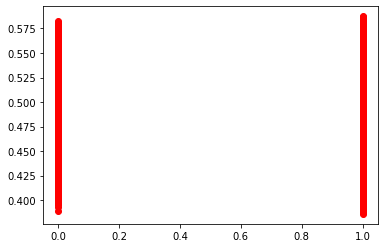

In [34]:
plt.scatter(y_test,y_pred,color ='red')
plt.show()